# Bank Marketing Prediction Project

This notebook aims to predict whether a bank client will subscribe to a term deposit (variable `y`), using data from Portuguese bank marketing campaigns. We will:

✅ Load and explore the data  
✅ Clean and preprocess the data  
✅ Perform exploratory data analysis (EDA)  
✅ Train and compare classification models with PyCaret  
✅ Interpret and conclude  

*Dataset source: Moro et al., 2011*  


In [45]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option("display.max_columns", None)

# Load the dataset
df = pd.read_csv("bank-full.csv", sep=";")

# Quick preview
df.head()

df["y_bin"] = df["y"].map({"yes": 1, "no": 0})
# Create a mapping dictionary
binary_map = {
    "yes": 1,
    "no": 0
}

# List of binary columns to convert
binary_cols = ["y", "default", "housing", "loan"]

# Apply the map to each binary column
for col in binary_cols:
    df[col + "_bin"] = df[col].map(binary_map)



3️⃣ Data Overview

4️⃣ Descriptive Statistics



In [47]:
df.describe().round(0).astype(int)


,age,balance,day,duration,campaign,pdays,previous,y_bin,default_bin,housing_bin,loan_bin
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
mean,41,1362,16,258,3,40,1,0,0,1,0
std,11,3045,8,258,3,100,2,0,0,0,0
min,18,-8019,1,0,1,-1,0,0,0,0,0
25%,33,72,8,103,1,-1,0,0,0,0,0
50%,39,448,16,180,2,-1,0,0,0,1,0
75%,48,1428,21,319,3,-1,0,0,0,1,0
max,95,102127,31,4918,63,871,275,1,1,1,1


Removal of duration outliers

Removed 3235 rows as outliers in 'duration'


C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\2554005412.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_duration_clean, x="y", y="duration", palette="Set2")


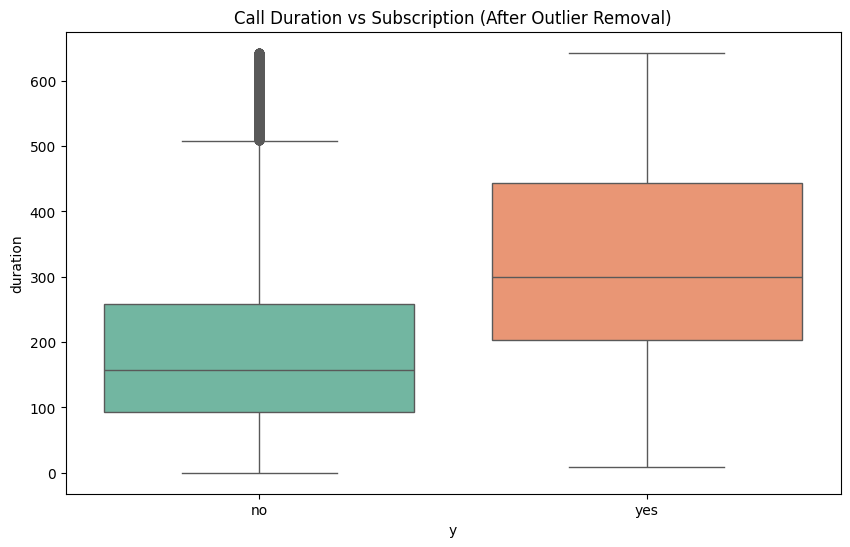

In [48]:
# calculate IQR
q1 = df['duration'].quantile(0.25)
q3 = df['duration'].quantile(0.75)
iqr = q3 - q1

# define boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# filter the dataframe
df_duration_clean = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

# show how many were removed
removed_count = len(df) - len(df_duration_clean)
print(f"Removed {removed_count} rows as outliers in 'duration'")

# optional: check new boxplot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df_duration_clean, x="y", y="duration", palette="Set2")
plt.title("Call Duration vs Subscription (After Outlier Removal)")
plt.show()


Descriptives Updated

In [49]:
# remove duration outliers in-place
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# apply filtering and overwrite
df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]

# now check
desc = df.describe().transpose()

for col in desc.columns:
    desc[col] = desc[col].apply(lambda x: int(x) if x == int(x) else round(x, 2))

cat_summary = df.describe(include='object').transpose()

print("🟢 Numerical variables summary:\n")
print(desc)
print("\n🟢 Categorical variables summary:\n")
print(cat_summary)


🟢 Numerical variables summary:

             count     mean      std   min  25%  50%   75%     max
age          41976    40.93    10.58    18   33   39    48      95
balance      41976  1347.34  3036.06 -8019   69  439  1407  102127
day          41976    15.82     8.34     1    8   16    21      31
duration     41976   203.49   140.81     0   98  167   277     643
campaign     41976     2.78     3.14     1    1    2     3      63
pdays        41976    40.59   100.65    -1   -1   -1    -1     871
previous     41976     0.59     2.34     0    0    0     0     275
y_bin        41976     0.09     0.28     0    0    0     0       1
default_bin  41976     0.02     0.13     0    0    0     0       1
housing_bin  41976     0.55     0.50     0    0    1     1       1
loan_bin     41976     0.16     0.37     0    0    0     0       1

🟢 Categorical variables summary:

           count unique          top   freq
job        41976     12  blue-collar   8999
marital    41976      3      married  253

5️⃣ Missing Values Check



In [50]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
y_bin          0
default_bin    0
housing_bin    0
loan_bin       0
dtype: int64

6️⃣ EDA Introduction
# 🕵️ Exploratory Data Analysis (EDA)

Let’s look at:
- the class distribution
- age
- job
- education
- duration
- campaign

to understand patterns before modeling.

In [51]:
7️⃣ Target Variable Plot

SyntaxError: invalid decimal literal (2457086967.py, line 1)

C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\683719827.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="y", data=df, palette="Set2")


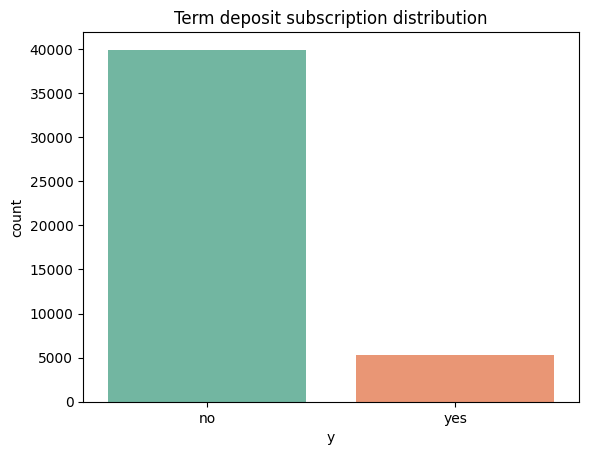

In [ ]:
sns.countplot(x="y", data=df, palette="Set2")
plt.title("Term deposit subscription distribution")
plt.show()


8️⃣ Age Distribution


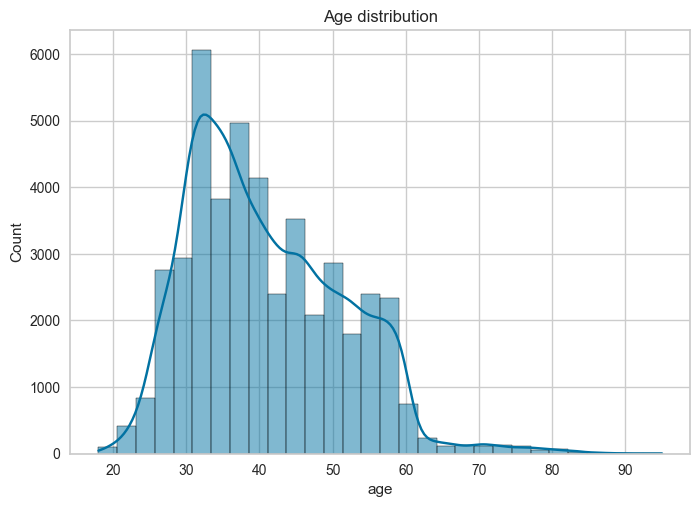

In [ ]:
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age distribution")
plt.show()


📌 Balance Analysis

C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\2855166731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="y", y="balance", palette="Set2")


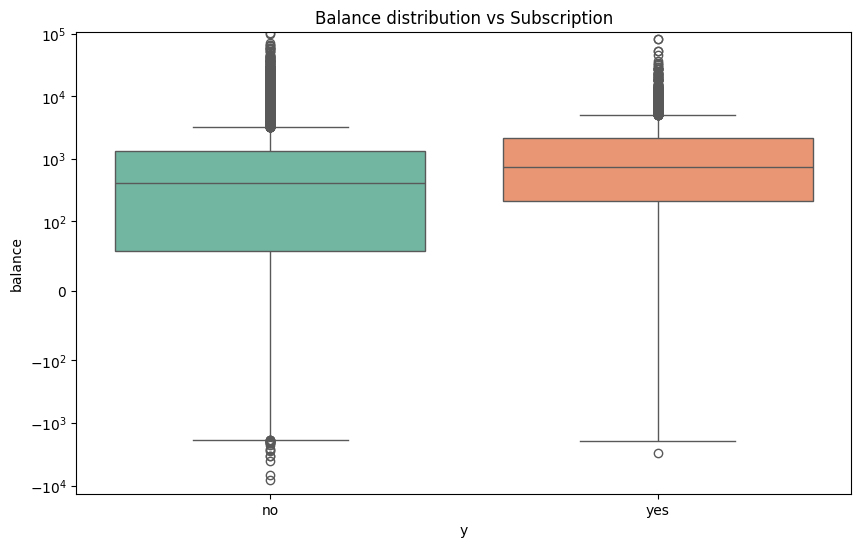

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="y", y="balance", palette="Set2")
plt.yscale('symlog', linthresh=100)  # treat near-zero linearly
plt.title("Balance distribution vs Subscription")
plt.show()




📌 Cell 4: Month / Seasonality

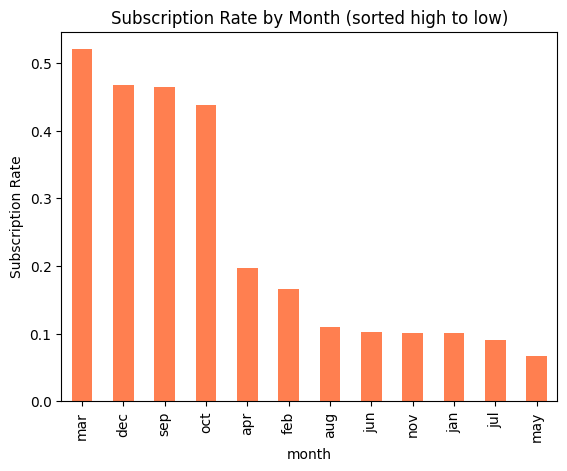

In [ ]:
month_conv = df.groupby('month')['y_bin'].mean().sort_values(ascending=False)

month_conv.plot(kind='bar', color='coral')
plt.ylabel("Subscription Rate")
plt.title("Subscription Rate by Month (sorted high to low)")
plt.show()


📌Campaign Analysis

C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\1533132801.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="y", y="campaign", palette="Set2", jitter=0.2, alpha=0.5)


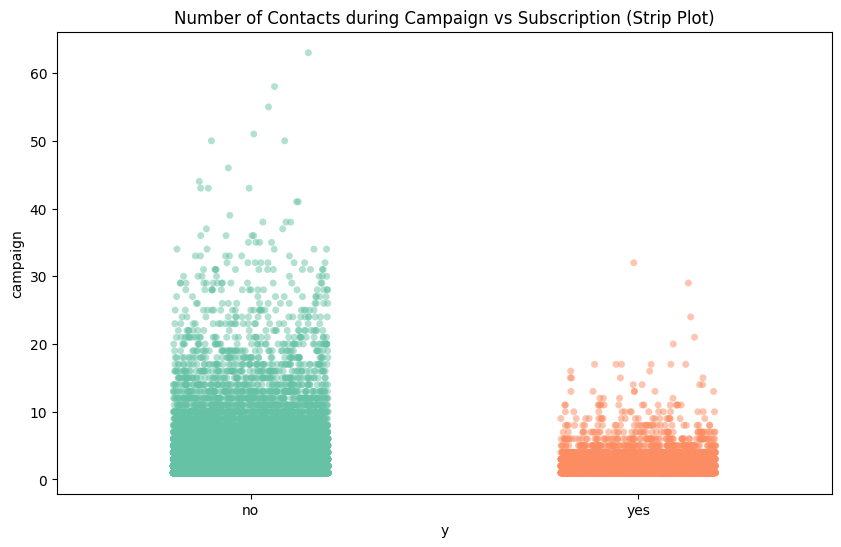

In [ ]:
plt.figure(figsize=(10,6))
sns.stripplot(data=df, x="y", y="campaign", palette="Set2", jitter=0.2, alpha=0.5)
plt.title("Number of Contacts during Campaign vs Subscription (Strip Plot)")
plt.show()


📌 Default, Housing, Loan

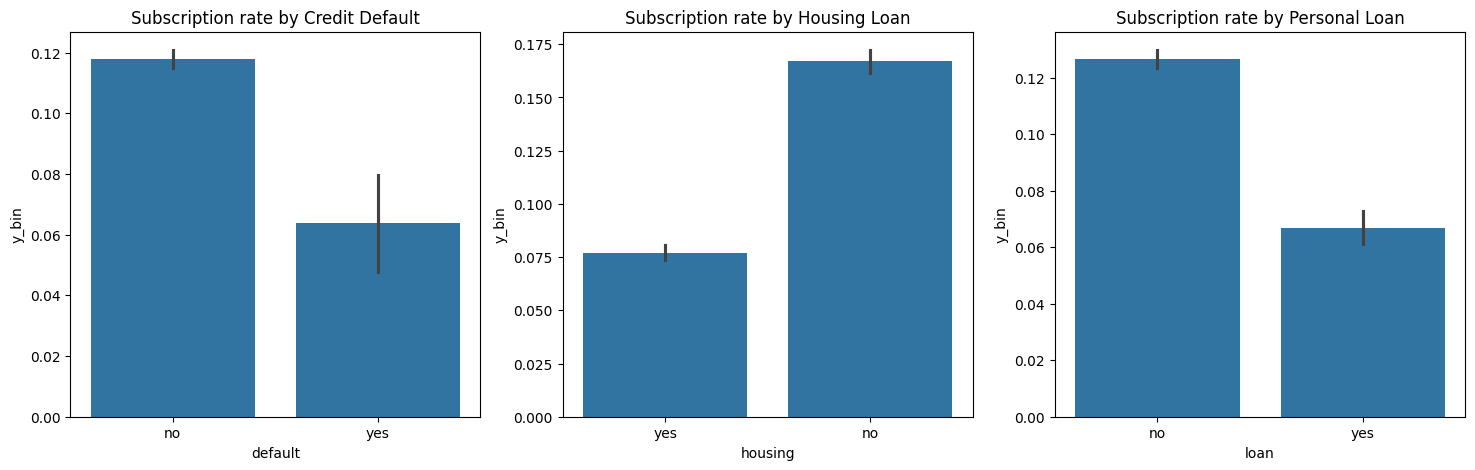

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(18,5))

sns.barplot(x="default", y="y_bin", data=df, ax=axs[0])
axs[0].set_title("Subscription rate by Credit Default")

sns.barplot(x="housing", y="y_bin", data=df, ax=axs[1])
axs[1].set_title("Subscription rate by Housing Loan")

sns.barplot(x="loan", y="y_bin", data=df, ax=axs[2])
axs[2].set_title("Subscription rate by Personal Loan")

plt.show()


📌  Pdays and Previous

C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\3274431770.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="was_contacted_before", y="y_bin", data=df, palette="Set2")


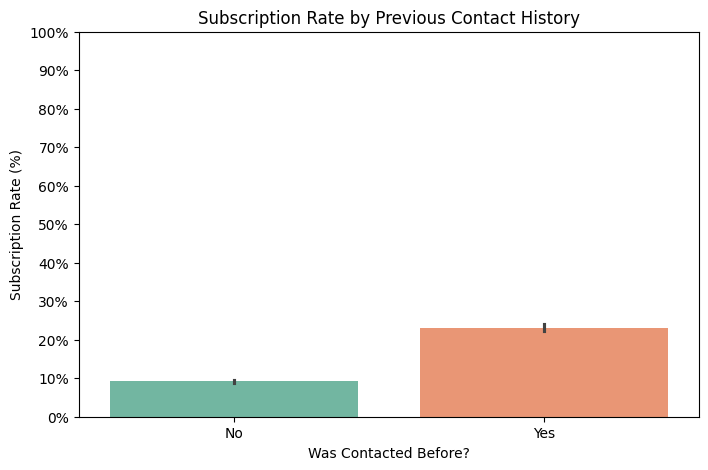

C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\3274431770.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y="previous", data=df, palette="Set2")


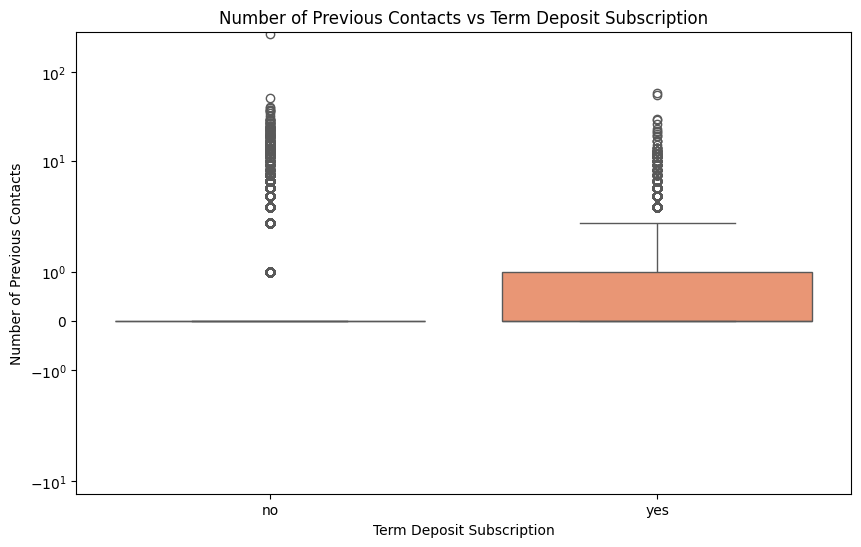

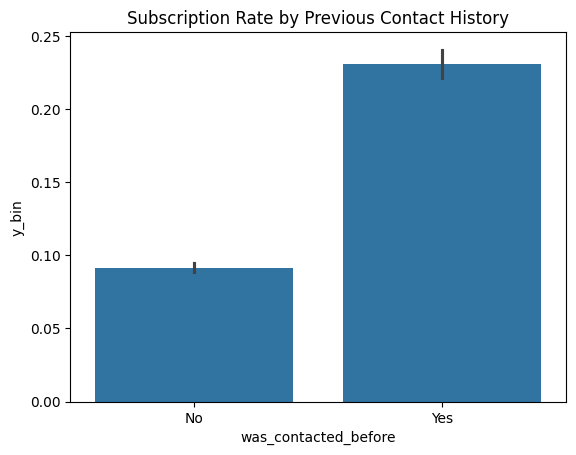

C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\3274431770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y="previous", data=df, palette="Set2")


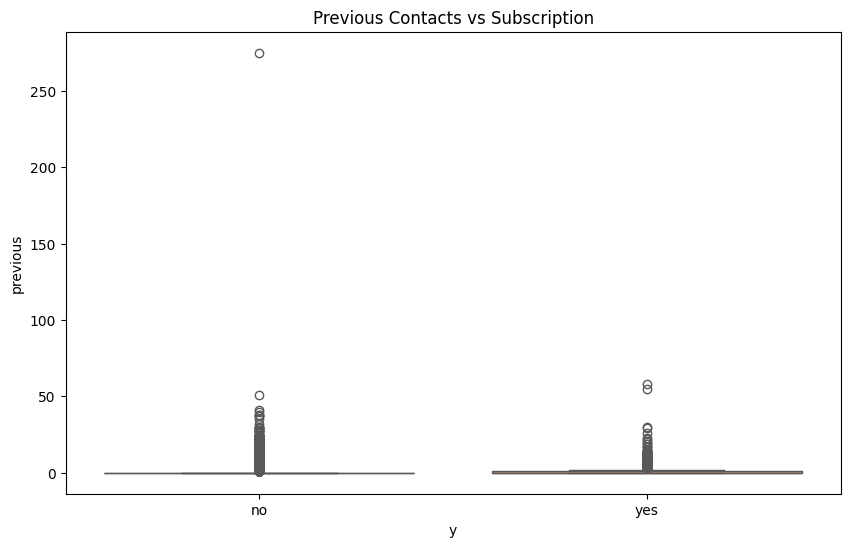

In [ ]:
# treat -1 separately
df['was_contacted_before'] = df['pdays'].apply(lambda x: "No" if x==-1 else "Yes")
# add a column indicating if the client was previously contacted
df['was_contacted_before'] = df['pdays'].apply(lambda x: "No" if x==-1 else "Yes")

# plot subscription rate by previous contact history
plt.figure(figsize=(8,5))
sns.barplot(x="was_contacted_before", y="y_bin", data=df, palette="Set2")
plt.title("Subscription Rate by Previous Contact History")
plt.ylabel("Subscription Rate (%)")
plt.xlabel("Was Contacted Before?")
plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 11), labels=[f"{int(x*100)}%" for x in np.linspace(0,1,11)])
plt.show()

# plot previous contacts distribution by subscription
plt.figure(figsize=(10,6))
sns.boxplot(x="y", y="previous", data=df, palette="Set2")
plt.title("Number of Previous Contacts vs Term Deposit Subscription")
plt.ylabel("Number of Previous Contacts")
plt.xlabel("Term Deposit Subscription")
plt.yscale("symlog")  # optional: to handle extreme outliers better
plt.show()

sns.barplot(x="was_contacted_before", y="y_bin", data=df)
plt.title("Subscription Rate by Previous Contact History")
plt.show()

# previous contacts
plt.figure(figsize=(10,6))
sns.boxplot(x="y", y="previous", data=df, palette="Set2")
plt.title("Previous Contacts vs Subscription")
plt.show()


📌Duration (for interpretability even if you remove it later)

C:\Users\Dr. Redha C AGGOUN\AppData\Local\Temp\ipykernel_24892\3499572281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="y", y="duration", data=df, palette="Set2")


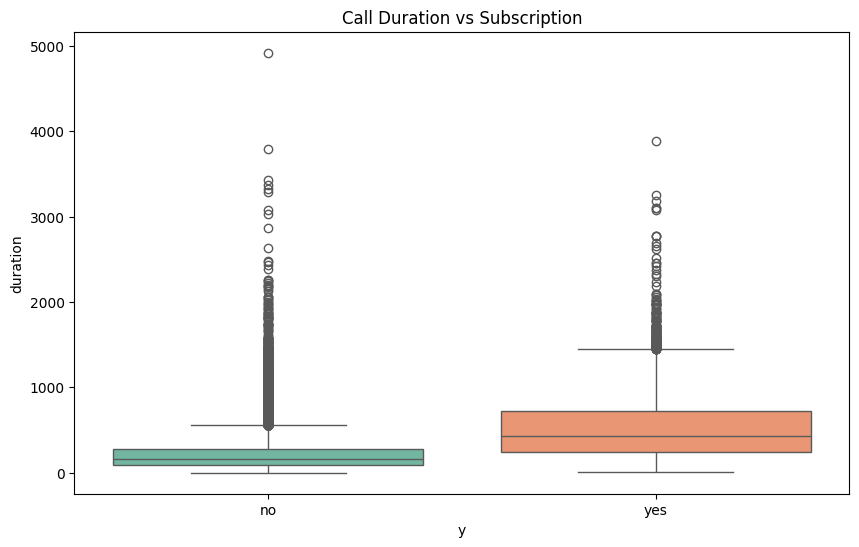

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="y", y="duration", data=df, palette="Set2")
plt.title("Call Duration vs Subscription")
plt.show()


9️⃣ Subscription by Job (percentages)

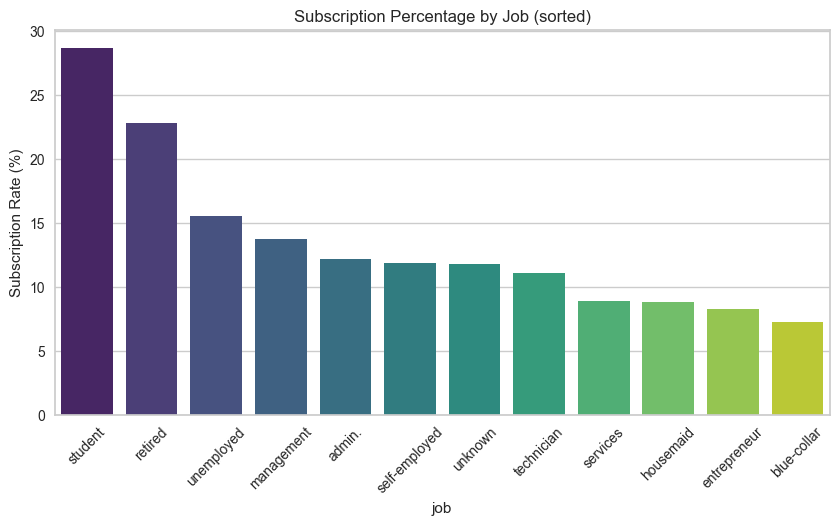

In [ ]:
# calculate subscription rate per job
job_subs = (
    df[df['y'] == 'yes']
    .groupby('job')
    .size()
    .div(df.groupby('job').size())
    .sort_values(ascending=False)
)

# convert to %
job_subs = job_subs * 100

# plot
plt.figure(figsize=(10,5))
sns.barplot(x=job_subs.index, y=job_subs.values, palette="viridis")
plt.ylabel("Subscription Rate (%)")
plt.title("Subscription Percentage by Job (sorted)")
plt.xticks(rotation=45)
plt.show()


🔟 Marital Status & Education

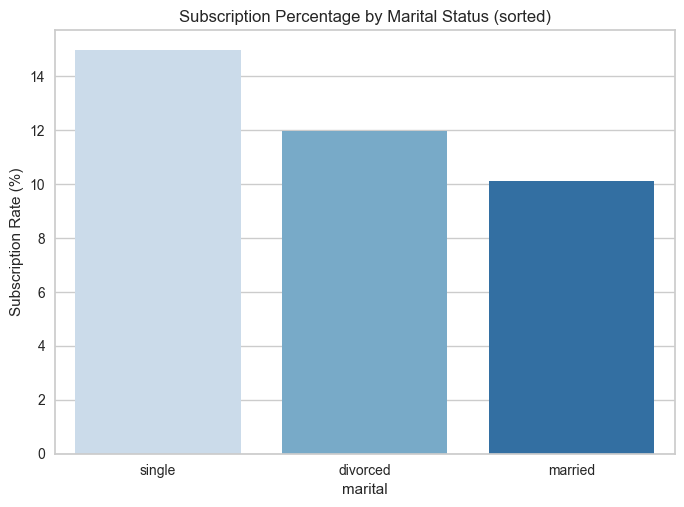

In [ ]:
marital_subs = (
    df[df['y'] == 'yes']
    .groupby('marital')
    .size()
    .div(df.groupby('marital').size())
    .sort_values(ascending=False)
) * 100

sns.barplot(x=marital_subs.index, y=marital_subs.values, palette="Blues")
plt.ylabel("Subscription Rate (%)")
plt.title("Subscription Percentage by Marital Status (sorted)")
plt.show()


 Subscription by Education

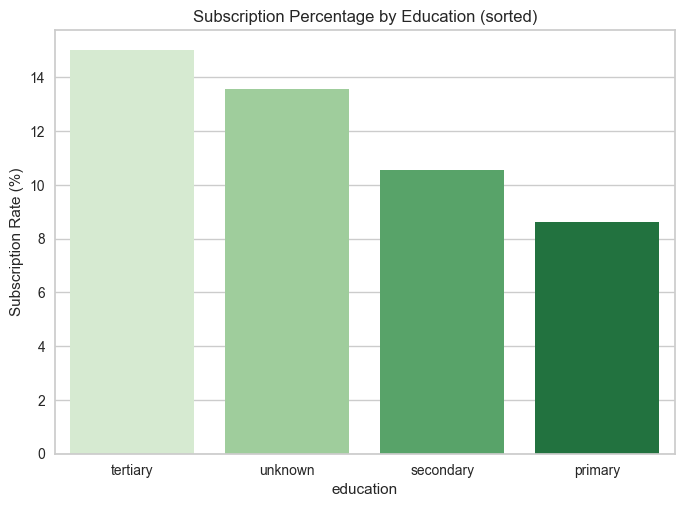

In [ ]:
education_subs = (
    df[df['y'] == 'yes']
    .groupby('education')
    .size()
    .div(df.groupby('education').size())
    .sort_values(ascending=False)
) * 100

sns.barplot(x=education_subs.index, y=education_subs.values, palette="Greens")
plt.ylabel("Subscription Rate (%)")
plt.title("Subscription Percentage by Education (sorted)")
plt.show()


Subscription by Contact Type

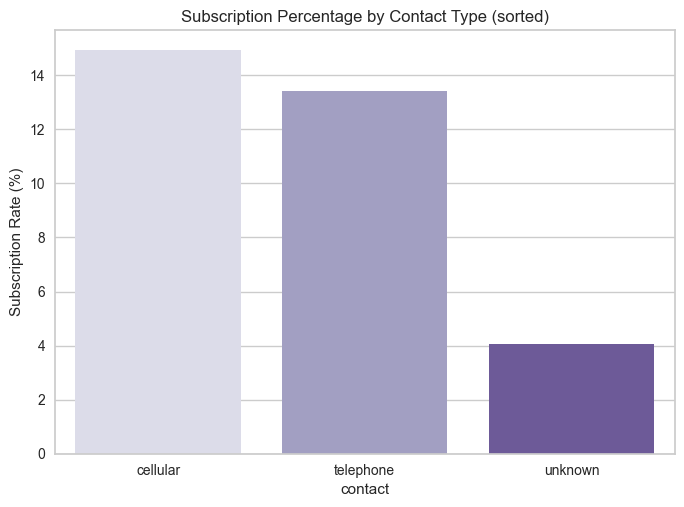

In [ ]:
contact_subs = (
    df[df['y'] == 'yes']
    .groupby('contact')
    .size()
    .div(df.groupby('contact').size())
    .sort_values(ascending=False)
) * 100

sns.barplot(x=contact_subs.index, y=contact_subs.values, palette="Purples")
plt.ylabel("Subscription Rate (%)")
plt.title("Subscription Percentage by Contact Type (sorted)")
plt.show()


Subscription by Poutcome (previous outcome)

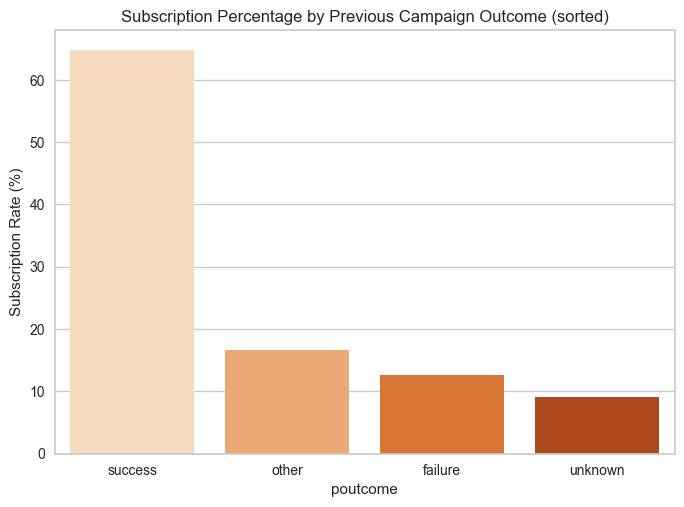

In [ ]:
poutcome_subs = (
    df[df['y'] == 'yes']
    .groupby('poutcome')
    .size()
    .div(df.groupby('poutcome').size())
    .sort_values(ascending=False)
) * 100

sns.barplot(x=poutcome_subs.index, y=poutcome_subs.values, palette="Oranges")
plt.ylabel("Subscription Rate (%)")
plt.title("Subscription Percentage by Previous Campaign Outcome (sorted)")
plt.show()


🟢 Step 5 — Install & Import PyCaret

In [ ]:
!!pip install pycaret

['Requirement already satisfied: pycaret in c:\\users\\dr. redha c aggoun\\.conda\\envs\\bankmarketing\\lib\\site-packages (3.3.2)',
 'Requirement already satisfied: ipython>=5.5.0 in c:\\users\\dr. redha c aggoun\\.conda\\envs\\bankmarketing\\lib\\site-packages (from pycaret) (8.37.0)',
 'Requirement already satisfied: ipywidgets>=7.6.5 in c:\\users\\dr. redha c aggoun\\.conda\\envs\\bankmarketing\\lib\\site-packages (from pycaret) (8.1.7)',
 'Requirement already satisfied: tqdm>=4.62.0 in c:\\users\\dr. redha c aggoun\\.conda\\envs\\bankmarketing\\lib\\site-packages (from pycaret) (4.67.1)',
 'Requirement already satisfied: numpy<1.27,>=1.21 in c:\\users\\dr. redha c aggoun\\.conda\\envs\\bankmarketing\\lib\\site-packages (from pycaret) (1.26.4)',
 'Requirement already satisfied: pandas<2.2.0 in c:\\users\\dr. redha c aggoun\\.conda\\envs\\bankmarketing\\lib\\site-packages (from pycaret) (2.1.4)',
 'Requirement already satisfied: jinja2>=3 in c:\\users\\dr. redha c aggoun\\.conda\\en

🟢 Step 6 — PyCaret Setup

In [ ]:
from pycaret.classification import *


PyCaret setup block (this defines the experiment for classification):

In [ ]:
clf1 = setup(
    data=df,
    target='y',
    session_id=123,
    categorical_features=[
        'job', 'marital', 'education', 'default', 'housing',
        'loan', 'contact', 'month', 'poutcome'
    ]
)


,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Numeric features,7
9,Categorical features,9


(PyCaret flow)
Quick cheat sheet
Accuracy → “Overall correctness”

AUC → “Ranking ability regardless of threshold”

Recall → “Did I find most of the positives?”

Precision → “Were my positive predictions correct?”

F1 → “Balance between precision and recall”

Kappa → “Agreement beyond random”

MCC → “Balanced correlation-like measure”

TT → “How fast was it?”

In [52]:
best_model = compare_models()

NameError: name 'compare_models' is not defined

Tuning the best model: lightgbm

In [ ]:
# rerun compare_models and store its best result
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9076,0.9356,0.9076,0.8999,0.9025,0.5052,0.5102,0.4400
gbc,Gradient Boosting Classifier,0.9062,0.9256,0.9062,0.8948,0.8970,0.4626,0.4765,0.7790
rf,Random Forest Classifier,0.9046,0.9279,0.9046,0.8917,0.8933,0.4358,0.4555,0.4390
lr,Logistic Regression,0.9006,0.9045,0.9006,0.8854,0.8867,0.3945,0.4190,1.1330
lda,Linear Discriminant Analysis,0.9006,0.9070,0.9006,0.8906,0.8938,0.4562,0.4632,0.1530
ridge,Ridge Classifier,0.8995,0.9070,0.8995,0.8830,0.8809,0.3506,0.3899,0.1060
ada,Ada Boost Classifier,0.8994,0.9113,0.8994,0.8855,0.8885,0.4143,0.4298,0.3270
et,Extra Trees Classifier,0.8994,0.9094,0.8994,0.8841,0.8861,0.3940,0.4158,0.4930
dummy,Dummy Classifier,0.8830,0.5000,0.8830,0.7797,0.8282,0.0000,0.0000,0.1100
knn,K Neighbors Classifier,0.8810,0.7585,0.8810,0.8582,0.8649,0.2798,0.2962,0.5730


In [ ]:
tuned_model = tune_model(best_model)


In [ ]:
final_model = finalize_model(tuned_model)


Evaluate the finalized model:

In [ ]:
evaluate_model(final_model)


Make predictions

In [ ]:
predictions = predict_model(final_model)

Save 

In [ ]:
save_model(final_model, 'bankmarketing_lightgbm')

1️⃣ Evaluate the finalized model

In [ ]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:
lgbm_model = create_model('lightgbm')


NameError: name 'create_model' is not defined

Finalize the tuned model

In [ ]:
final_model = finalize_model(tuned_model)


built-in plots to visually analyze how your model is performing, even after finalization.

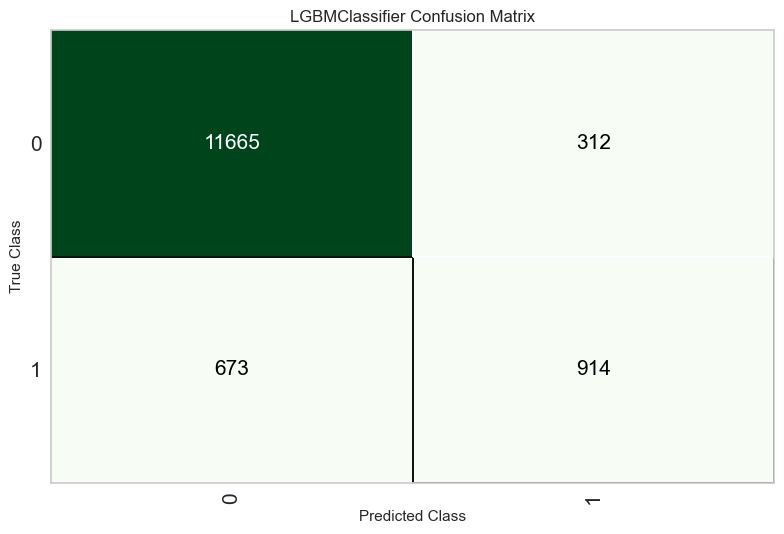

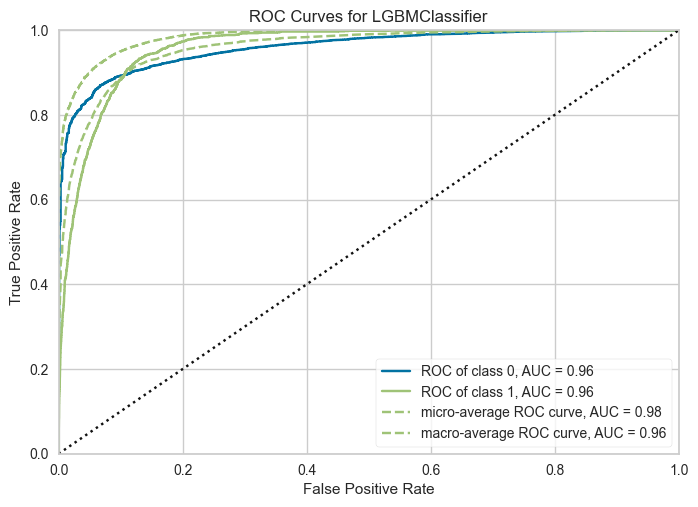

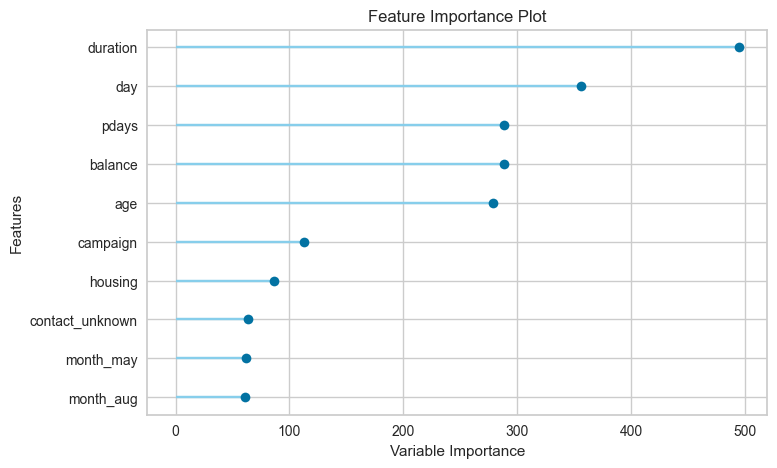

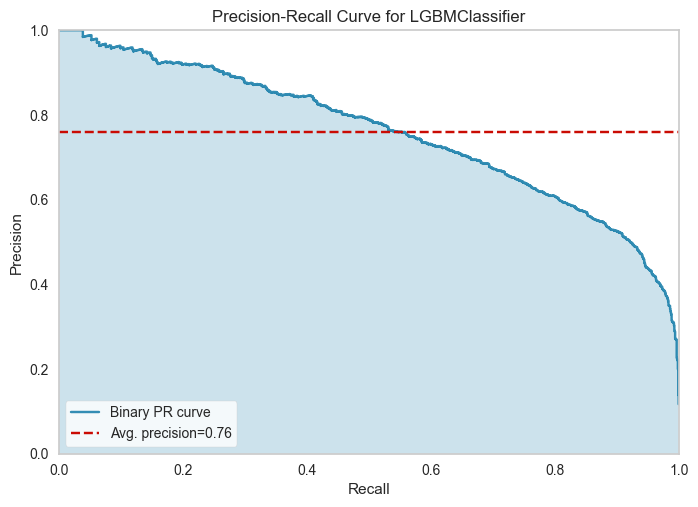

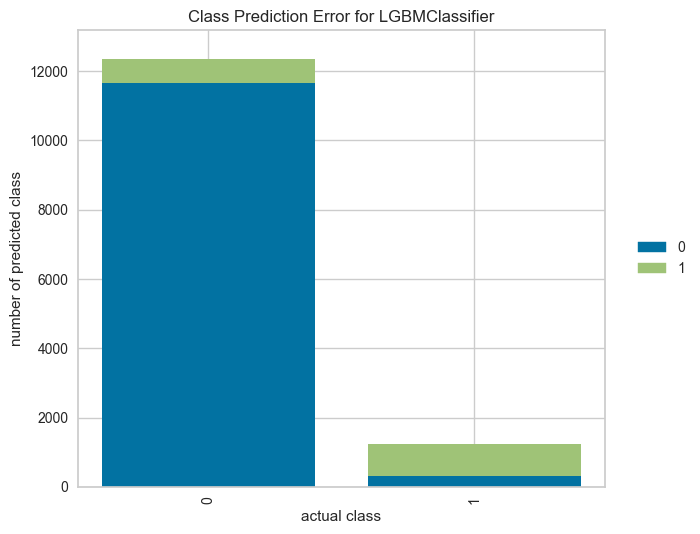

In [ ]:
# Show a confusion matrix
plot_model(final_model, plot='confusion_matrix')

# Show an ROC curve
plot_model(final_model, plot='auc')

# Show a feature importance plot
plot_model(final_model, plot='feature')

# Show a precision-recall curve
plot_model(final_model, plot='pr')

# Show error plots
plot_model(final_model, plot='error')


we will remove duratoin, days and pdays from the model

In [ ]:
clf_cleaner = setup(
    data=df.drop(columns=['duration', 'day', 'pdays']),
    target='y',
    session_id=123,
    categorical_features=[
        'job', 'marital', 'education', 'default', 'housing', 
        'loan', 'contact', 'month', 'poutcome'
    ]
)


,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 14)"
5,Transformed data shape,"(45211, 46)"
6,Transformed train set shape,"(31647, 46)"
7,Transformed test set shape,"(13564, 46)"
8,Numeric features,4
9,Categorical features,9


recommended cleaned feature list

In [ ]:
selected_features = [
    'age', 'job', 'marital', 'education', 'default',
    'balance', 'housing', 'loan', 'contact', 'month',
    'campaign', 'previous', 'poutcome'
]


Cleaning

In [ ]:
clf_cleaned = setup(
    data=df[selected_features + ['y']],
    target='y',
    session_id=123,
    categorical_features=[
        'job', 'marital', 'education', 'default', 
        'housing', 'loan', 'contact', 'month', 'poutcome'
    ]
)


,Description,Value
0,Session id,123
1,Target,y
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 14)"
5,Transformed data shape,"(45211, 46)"
6,Transformed train set shape,"(31647, 46)"
7,Transformed test set shape,"(13564, 46)"
8,Numeric features,4
9,Categorical features,9


compare models:

In [ ]:
best_cleaned_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8925,0.7796,0.8925,0.8708,0.8655,0.2496,0.3056,0.6310
ridge,Ridge Classifier,0.8922,0.7607,0.8922,0.8704,0.8646,0.2433,0.3010,0.1020
lr,Logistic Regression,0.8919,0.7641,0.8919,0.8699,0.8632,0.2332,0.2938,1.1940
lightgbm,Light Gradient Boosting Machine,0.8917,0.7769,0.8917,0.8691,0.8680,0.2714,0.3152,0.3960
ada,Ada Boost Classifier,0.8915,0.7704,0.8915,0.8688,0.8643,0.2428,0.2975,0.2910
lda,Linear Discriminant Analysis,0.8889,0.7607,0.8889,0.8679,0.8721,0.3126,0.3358,0.1360
rf,Random Forest Classifier,0.8867,0.7491,0.8867,0.8612,0.8648,0.2600,0.2920,0.4510
dummy,Dummy Classifier,0.8830,0.5000,0.8830,0.7797,0.8282,0.0000,0.0000,0.1070
knn,K Neighbors Classifier,0.8745,0.6097,0.8745,0.8249,0.8381,0.0865,0.1148,0.5490
et,Extra Trees Classifier,0.8727,0.7222,0.8727,0.8497,0.8580,0.2509,0.2615,0.4790


✅ Duration is only known after the call is finished

✅ Dropping duration, day, and pdays reduced performance slightly (AUC from ~0.93 to ~0.77) because those features had strong predictive power — but they were artificially strong (leakage).
👉 So the new results are more honest and deployable.

✅ Gradient Boosting Classifier still comes out on top with an accuracy ~89% and F1 ~0.86, which is excellent.

✅ The other models (ridge, logistic regression, lightgbm) are very close, which is reassuring: there is no severe overfitting.

tuning the Gradient Boosting Classifier (gbc) : 1️⃣ Create the model object

In [ ]:
gbc_model = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8894,0.7979,0.8894,0.8644,0.8630,0.2401,0.2878
1,0.8932,0.7679,0.8932,0.8721,0.8699,0.2828,0.3286
2,0.8891,0.7516,0.8891,0.8632,0.8593,0.2100,0.2662
3,0.8894,0.7784,0.8894,0.8642,0.8629,0.2373,0.2849
4,0.8938,0.7857,0.8938,0.8735,0.8674,0.2604,0.3175
5,0.8942,0.7827,0.8942,0.8749,0.8660,0.2486,0.3131
6,0.8894,0.7803,0.8894,0.8640,0.8588,0.2054,0.2648
7,0.8966,0.7595,0.8966,0.8798,0.8705,0.2765,0.3400
8,0.8951,0.8018,0.8951,0.8759,0.8696,0.2741,0.3307


📊 Interpretation

This model is quite robust (close to 90% accuracy, decent AUC, balanced F1).

Precision and recall are well-balanced, which is great for marketing campaign predictions.

However, Kappa and MCC are still modest, showing there is room for improvement if you want even more robust agreement.

visualizations : 1️⃣ Confusion Matrix

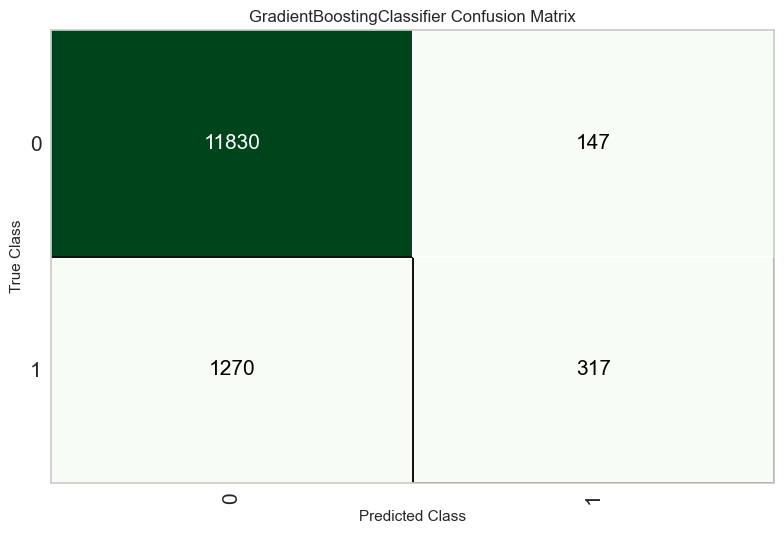

In [ ]:
plot_model(final_gbc, plot='confusion_matrix')

visualizations : 2️⃣ ROC Curve

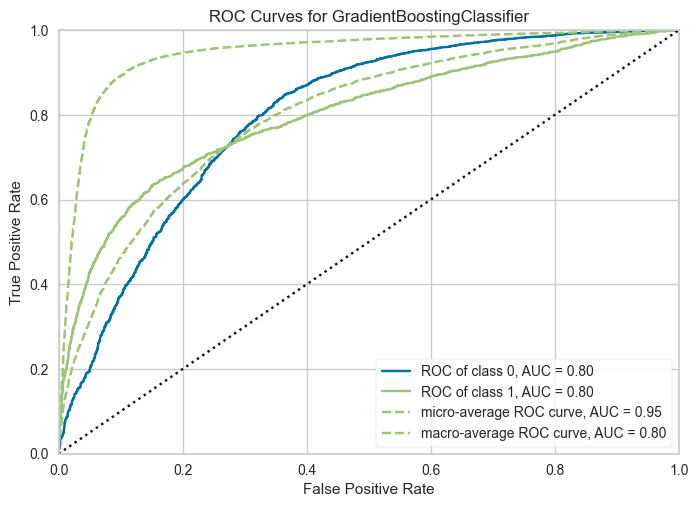

In [ ]:
plot_model(final_gbc, plot='auc')

visualizations : 3️⃣ Feature Importance

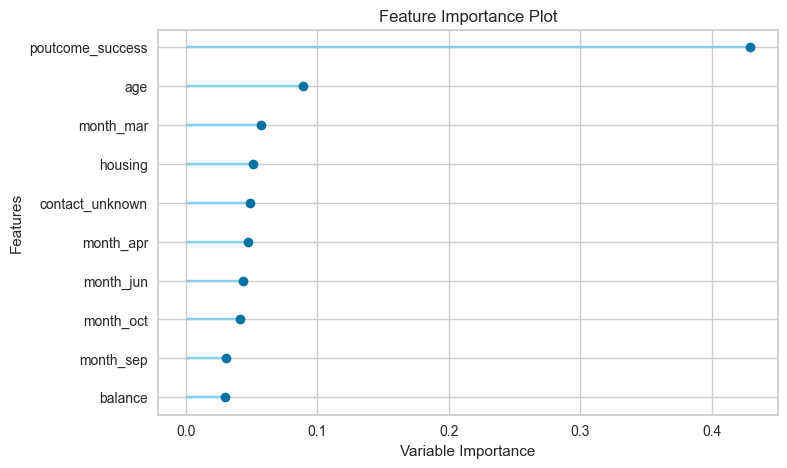

In [ ]:
plot_model(final_gbc, plot='feature')